<a href="https://colab.research.google.com/github/babymlin/Reduce-Dimension/blob/main/t-SNE_mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
from sklearn import manifold

In [2]:
(x_train, y_train), (x_val, y_val) = keras.datasets.mnist.load_data()
x_train = np.expand_dims(x_train, axis=-1)
x_val = np.expand_dims(x_val, axis=-1)
y_train = keras.utils.to_categorical(y_train, num_classes=10)
y_val = keras.utils.to_categorical(y_val, num_classes=10)

11493376/11490434 [==============================] - 0s 0us/step


In [3]:
x_train.shape, y_train.shape

((60000, 28, 28, 1), (60000, 10))

In [4]:
model = keras.models.Sequential([
    keras.layers.Conv2D(16 ,3, padding='same', activation='relu', input_shape=(28,28,1)),
    keras.layers.Conv2D(16 ,3, padding='same', activation='relu'),
    keras.layers.MaxPooling2D(),
    keras.layers.Conv2D(32 ,3, padding='same', activation='relu'),
    keras.layers.Conv2D(32 ,3, padding='same', activation='relu'),
    keras.layers.MaxPooling2D(),
    keras.layers.Flatten(),
    keras.layers.Dense(10, activation='softmax')
])

In [5]:
model.compile(keras.optimizers.Adam(), keras.losses.categorical_crossentropy, metrics=[keras.metrics.categorical_accuracy])

In [6]:
model.fit(x_train, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 40s 4ms/step - loss: 0.1786 - categorical_accuracy: 0.9530
Epoch 2/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0544 - categorical_accuracy: 0.9827
Epoch 3/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0419 - categorical_accuracy: 0.9866
Epoch 4/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0358 - categorical_accuracy: 0.9884
Epoch 5/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0316 - categorical_accuracy: 0.9899
Epoch 6/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0262 - categorical_accuracy: 0.9915
Epoch 7/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0232 - categorical_accuracy: 0.9926
Epoch 8/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0227 - categorical_accuracy: 0.9929
Epoch 9/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0195 - ca

In [7]:
model2 = keras.models.Model(model.inputs, model.layers[-2].output)

In [8]:
model2.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_input (InputLayer)    [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 28, 28, 16)        160       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 16)        2320      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 32)        4640      
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 14, 14, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 32)          0     

In [9]:
x_train_features = model2.predict(x_train)

In [10]:
y_train_raw = np.argmax(y_train, axis=-1)

In [11]:
x_train_features.shape, y_train_raw.shape

((60000, 1568), (60000,))

In [12]:
x_tsne = manifold.TSNE(n_components=2, init='random', random_state=5, verbose=1).fit_transform(x_train_features[:1000])

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 1000 samples in 0.130s...
[t-SNE] Computed neighbors for 1000 samples in 3.865s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1000
[t-SNE] Mean sigma: 12.177517
[t-SNE] KL divergence after 250 iterations with early exaggeration: 69.575562
[t-SNE] KL divergence after 1000 iterations: 0.731580


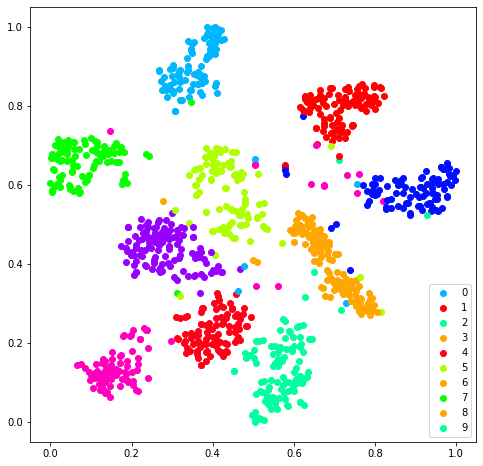

In [13]:
# normalize
x_min, x_max = x_tsne.min(0), x_tsne.max(0)
x_norm = (x_tsne - x_min) / (x_max - x_min)

plt.figure(figsize=(8, 8))
cmap = plt.cm.get_cmap("hsv", 10)
for i in range(len(x_tsne[:])):
    digit = y_train_raw[i]
    plt.scatter(x_norm[i, 0], x_norm[i, 1], color=cmap(digit), )
plt.legend([str(i) for i in range(10)])
plt.show()